In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [31]:
#----PSO参数设置------#
class PSO():
    def __init__(self, pN, dim, max_iter):
        self.w = 0.8
        self.c1 = 2
        self.c2 = 2
        self.r1 = 0.6
        self.r2 = 0.3
        self.pN = pN # 粒子数量
        self.dim = dim # 搜索维度
        self.max_iter = max_iter # 迭代次数
        self.X = np.zeros((self.pN, self.dim))  # 所有粒子的位置和速度
        self.V = np.zeros((self.pN, self.dim))
        self.pbest = np.zeros((self.pN, self.dim))  # 个体经历的最佳位置和全局最佳位置
        self.gbest = np.zeros((1, self.dim))
        self.p_fit = np.zeros(self.pN)  # 每个个体的历史最佳适应值
        self.fit = 1e10  # 全局最佳适应值
    
    #----目标函数Sphere函数---#
    def function(self, x):
        sum1 = 0
        length = len(x)
        x = x**2
        for i in range(length):
            sum1 += x[i]
        return sum1
    
    #---初始化种群---#
    def init_Population(self):
        for i in range(self.pN):
            for j in range(self.dim):
                self.X[i][j] = random.uniform(0,1)
                self.V[i][j] = random.uniform(0,1)
            self.pbest[i] = self.X[i]
            tmp = self.function(self.X[i])
            self.p_fit[i] = tmp
            if tmp<self.fit:
                self.fit = tmp
                self.gbest = self.X[i]
    
    #---更新粒子位置---#
    def iterator(self):
        fitness = []
        for t in range(self.max_iter):
            for i in range(self.pN):  # updatae gbest/pbest
                temp = self.function(self.X[i])
                if temp < self.p_fit[i]:  # 个体最优pbest
                    self.p_fit[i] = temp
                    self.pbest[i] = self.X[i]
                    if self.p_fit[i]< self.fit:
                        self.fit = self.p_fit[i]
                        self.gbest = self.pbest[i]
            for i in range(self.pN):
                self.V[i] = self.w*self.V[i]+self.c1*self.r1*(self.pbest[i]-self.X[i]+\
                                                             self.c2*self.r2*(self.gbest-self.X[i]))
                self.X[i] = self.X[i]+self.V[i]
            fitness.append(self.fit)
#             print(self.fit)
        return fitness

In [32]:
my_pso = PSO(pN=30, dim=5, max_iter=50)
my_pso.init_Population()
fitness = my_pso.iterator()

[-0.00492211 -0.00129346  0.00432533  0.01033904 -0.00508632]


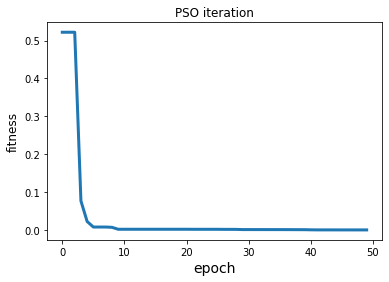

In [38]:
print(my_pso.gbest)
plt.figure(1)
plt.title('PSO iteration')
plt.xlabel('epoch', size=14)
plt.ylabel('fitness', size=12)
plt.plot(range(0,50),fitness,linewidth=3)
# plt.show()
           